In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("q_quora_train.csv")
df.shape

C:\Users\harsh\AppData\Local\Temp\ipykernel_23604\3437866221.py:1: DtypeWarning: Columns (7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("q_quora_train.csv")


(404351, 13)

In [25]:
df = df.iloc[:, :6]
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [26]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
140244,140244,277609,277610,Should I still join the military now that Trum...,How did Donald Trump win the 2016 Presidential...,0
324522,324522,636581,636582,Which continent does Russia belong to?,Why is Africa called the Dark Continent?,0
349576,349576,582979,684874,Why were there a series of movies in the 80's ...,Which characters in The Wolf of Wall Street (2...,0
89379,89379,177466,177467,What is the future for Android developers?,How is Future To Android Developer?,1
35853,35853,71438,71439,What does giftedness feel like?,What does it feel like to be gifted?,1
89704,89704,178110,178111,How do I obtain a police/incident report that ...,Can a person be charged for filing false polic...,0
56039,56039,111491,111492,How would one start a country?,How does someone start their own country?,1
398523,398523,778660,778661,Which is the best way to scale up a business?,What is the best way to scale my business?,1
205459,205459,405350,405351,What is the life at RBI as a Grade B officer?,What is the life of a RBI B grade officer?,1
181395,181395,358264,358265,What is the difference between precise and acc...,What is the difference between precision and r...,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.5+ MB


In [28]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [29]:
# duplicate rows
df.duplicated().sum()

0

In [30]:
print(df['is_duplicate'].dtype)


# df = df[df['is_duplicate'].isin([0, 1])].dropna(subset=['is_duplicate'])
# df = df[df['is_duplicate'].isin([0, 1])]
# df.head(5)

object


In [31]:
df['is_duplicate'] = pd.to_numeric(df['is_duplicate'], errors='coerce')


In [32]:
df = df[df['is_duplicate'].isin([0, 1])]


In [33]:
print(df['is_duplicate'].unique())
print(df['is_duplicate'].dtype)


[0. 1.]
float64


In [34]:
df['is_duplicate'] = df['is_duplicate'].astype(int)


C:\Users\harsh\AppData\Local\Temp\ipykernel_23604\1892541605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_duplicate'] = df['is_duplicate'].astype(int)


is_duplicate
0    254748
1    149267
Name: count, dtype: int64
is_duplicate
0    63.054095
1    36.945905
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

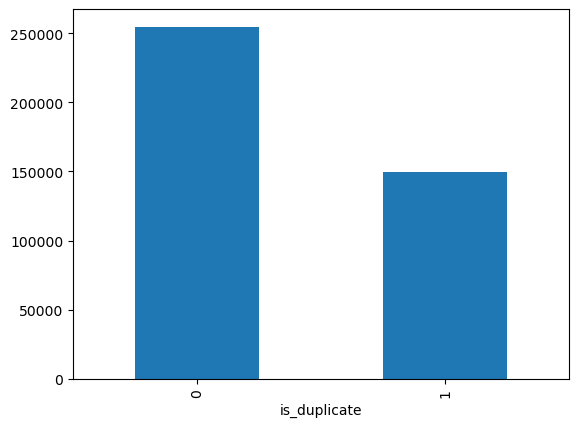

In [35]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [36]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789154
Number of questions getting repeated 13675


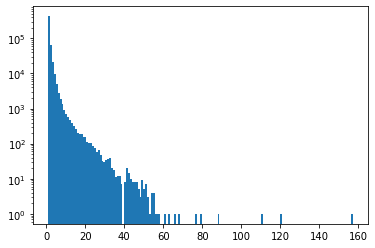

In [20]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()